# Alarm Logs in Packaging Industry (ALPI)

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Dataset source: https://ieee-dataport.org/open-access/alarm-logs-packaging-industry-alpi

In [2]:
data_path = "../data/alarms-log-data/raw/alarms.csv"
df = pd.read_csv(data_path)
df["timestamp"] = pd.to_datetime(df["timestamp"])

display(df.head())
print("Num. rows:", len(df))

,timestamp,alarm,serial
0,2019-02-21 19:57:57.532,139,4
1,2019-02-21 19:58:28.293,139,4
2,2019-02-21 19:58:32.853,139,4
3,2019-02-21 19:59:05.387,139,4
4,2019-02-21 20:02:05.832,139,4


Num. rows: 444834


In [3]:
df_1sec = df.copy()
df_1sec["timestamp"] = df_1sec["timestamp"].dt.ceil(freq='s')
df_1sec = df_1sec.drop_duplicates()
df_1sec = df_1sec.reset_index(drop=True)

display(df_1sec.head())
print("Num. rows:", len(df_1sec))

,timestamp,alarm,serial
0,2019-02-21 19:57:58,139,4
1,2019-02-21 19:58:29,139,4
2,2019-02-21 19:58:33,139,4
3,2019-02-21 19:59:06,139,4
4,2019-02-21 20:02:06,139,4


Num. rows: 442797


In [4]:
machines = df_1sec["serial"].value_counts()
machines = pd.DataFrame(machines)
machines = machines.sort_values(by=["serial"])
# machines.head()

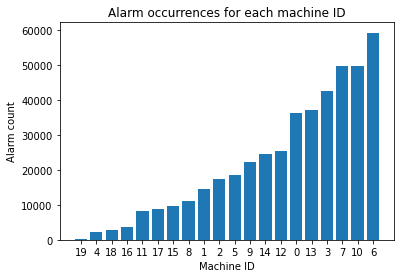

In [5]:
machine_ids = list(map(lambda x: str(x), machines.index))

plt.bar(machine_ids, machines.serial)
plt.title("Alarm occurrences for each machine ID")
plt.xlabel("Machine ID")
plt.ylabel("Alarm count")
plt.show()

In [6]:
alarms = df_1sec["alarm"].value_counts()
alarms = pd.DataFrame(alarms)
alarms = alarms.sort_values(by=["alarm"])
# alarms.head()

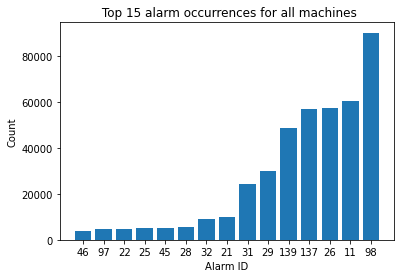

In [7]:
alarm_ids = list(map(lambda x: str(x), alarms.index))

top_n = 15
plt.bar(alarm_ids[-top_n:], alarms.alarm[-top_n:])
plt.title(f" Top {top_n} alarm occurrences for all machines")
plt.xlabel("Alarm ID")
plt.ylabel("Count")
plt.show()

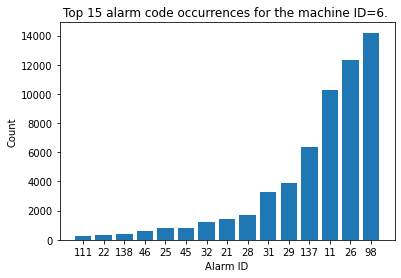

In [8]:
machine_6 = df_1sec[df_1sec["serial"] == 6]

alarms = machine_6["alarm"].value_counts()
alarms = pd.DataFrame(alarms)
alarms = alarms.sort_values(by=["alarm"])

alarm_ids = list(map(lambda x: str(x), alarms.index))

top_n = 15
plt.bar(alarm_ids[-top_n:], alarms.alarm[-top_n:])
plt.title(f"Top {top_n} alarm code occurrences for the machine ID=6. ")
plt.xlabel("Alarm ID")
plt.ylabel("Count")
plt.show()

In [9]:
%%time 

top_10_alarms = [45, 32, 21, 28, 31, 29, 137, 11, 26, 98]

machine_6 = machine_6.loc[machine_6['alarm'].isin(top_10_alarms)]\
    .drop("serial", axis=1)\
    .set_index(["timestamp"])\
    .asfreq(freq='1s')\
    .fillna(0)\
    .astype(int)\
    .astype("category")

machine_6["label"] = machine_6["alarm"]

display(machine_6.head())

print("Num. rows:", len(machine_6))

,alarm,label
timestamp,,
2019-02-21 12:56:15,28,28
2019-02-21 12:56:16,0,0
2019-02-21 12:56:17,0,0
2019-02-21 12:56:18,0,0
2019-02-21 12:56:19,0,0


Num. rows: 41584107
CPU times: user 2.31 s, sys: 839 ms, total: 3.15 s
Wall time: 3.25 s


In [10]:
machine_6.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41584107 entries, 2019-02-21 12:56:15 to 2020-06-16 20:04:41
Freq: S
Data columns (total 2 columns):
 #   Column  Dtype   
---  ------  -----   
 0   alarm   category
 1   label   category
dtypes: category(2)
memory usage: 396.6 MB


In [11]:
data_path = "../data/alarms-log-data/processed/machine-6-alarms-labels.parquet.gzip"
machine_6.to_parquet(data_path, compression="gzip", index=True)

In [ ]:
machine_6_ohe = pd.get_dummies(machine_6, prefix=['alarm'], prefix_sep='_')
machine_6_ohe = machine_6_ohe.drop("alarm_0", axis=1)
machine_6_ohe.head()